# Mapping Sonoma's Housing Stock by Tenure

What percentage of residents are homeowners vs. renters in various parts of Sonoma County? As we go about trying to understand the affects of wildfires on rent increases in the county, it will be helpful to understand where rental units are located, and how many of them there are.

Author: Jeremy Epstein

In [1]:
# data wrangling
import pandas as pd

# spatial data
import geopandas as gpd

# basemaps 
import contextily as ctx

# plots
import matplotlib.pyplot as plt

In [2]:
# bringing in the data
gdf = gpd.read_file('acs2019_5yr_B25008_15000US060971513081.geojson')

This data file is Total Population in Occupied Housing Units by Tenure and was taken from Census Reporter.

## Inspecting the Data

In [3]:
gdf.shape

(388, 9)

In [4]:
gdf.head()

,geoid,name,B25008001,"B25008001, Error",B25008002,"B25008002, Error",B25008003,"B25008003, Error",geometry
0,05000US06097,"Sonoma County, CA",491248.0,608.0,299451.0,4782.0,191797.0,4731.0,"MULTIPOLYGON (((-122.93506 38.31395, -122.9350..."
1,15000US060971501001,"Block Group 1, Sonoma, CA",1637.0,349.0,1294.0,332.0,343.0,203.0,"MULTIPOLYGON (((-122.46231 38.26304, -122.4623..."
2,15000US060971501002,"Block Group 2, Sonoma, CA",728.0,300.0,432.0,245.0,296.0,202.0,"MULTIPOLYGON (((-122.53116 38.23141, -122.5310..."
3,15000US060971501003,"Block Group 3, Sonoma, CA",261.0,118.0,121.0,82.0,140.0,104.0,"MULTIPOLYGON (((-122.45877 38.10383, -122.4586..."
4,15000US060971502021,"Block Group 1, Sonoma, CA",849.0,357.0,432.0,217.0,417.0,352.0,"MULTIPOLYGON (((-122.45893 38.29226, -122.4589..."


Next, I went to drop the top row of data since it doesn't make sense to map county totals.  I ran the following command: gdf = gdf.drop([0])  Subsequently, I accidentally ran it again creating an error message and obscuring the process (since row 0 had already been dropped).  Below is the updated dataset with the first row elided:

In [7]:
gdf

,geoid,name,B25008001,"B25008001, Error",B25008002,"B25008002, Error",B25008003,"B25008003, Error",geometry
1,15000US060971501001,"Block Group 1, Sonoma, CA",1637.0,349.0,1294.0,332.0,343.0,203.0,"MULTIPOLYGON (((-122.46231 38.26304, -122.4623..."
2,15000US060971501002,"Block Group 2, Sonoma, CA",728.0,300.0,432.0,245.0,296.0,202.0,"MULTIPOLYGON (((-122.53116 38.23141, -122.5310..."
3,15000US060971501003,"Block Group 3, Sonoma, CA",261.0,118.0,121.0,82.0,140.0,104.0,"MULTIPOLYGON (((-122.45877 38.10383, -122.4586..."
4,15000US060971502021,"Block Group 1, Sonoma, CA",849.0,357.0,432.0,217.0,417.0,352.0,"MULTIPOLYGON (((-122.45893 38.29226, -122.4589..."
5,15000US060971502022,"Block Group 2, Sonoma, CA",762.0,215.0,468.0,176.0,294.0,194.0,"MULTIPOLYGON (((-122.47584 38.29376, -122.4758..."
...,...,...,...,...,...,...,...,...,...
383,15000US060971543032,"Block Group 2, Sonoma, CA",780.0,195.0,527.0,159.0,253.0,116.0,"MULTIPOLYGON (((-123.53707 38.76806, -123.5337..."
384,15000US060971543041,"Block Group 1, Sonoma, CA",761.0,163.0,497.0,121.0,264.0,133.0,"MULTIPOLYGON (((-123.49916 38.77833, -123.4973..."
385,15000US060971543042,"Block Group 2, Sonoma, CA",551.0,163.0,425.0,158.0,126.0,67.0,"MULTIPOLYGON (((-123.21099 38.52538, -123.2107..."
386,15000US060971543043,"Block Group 3, Sonoma, CA",1013.0,315.0,462.0,173.0,551.0,268.0,"MULTIPOLYGON (((-123.13047 38.45219, -123.1302..."


In [8]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 387 entries, 1 to 387
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   geoid             387 non-null    object  
 1   name              387 non-null    object  
 2   B25008001         387 non-null    float64 
 3   B25008001, Error  387 non-null    float64 
 4   B25008002         387 non-null    float64 
 5   B25008002, Error  387 non-null    float64 
 6   B25008003         387 non-null    float64 
 7   B25008003, Error  387 non-null    float64 
 8   geometry          387 non-null    geometry
dtypes: float64(6), geometry(1), object(2)
memory usage: 38.3+ KB


Both the table and the .info command show that there seems to be an extra erroneous column for each metric (the .json file tells us that the three columns with relevant data are "total," "owner occupied," and "renter occupied" respectively.  Let's drop the extra columns.

In [9]:
columns_to_keep = ['geoid',
 'name',
 'B25008001',
 'B25008002',
 'B25008003',
 'geometry']

In [10]:
gdf = gdf[columns_to_keep]

In [11]:
# While we're at it, let's rename the columns too.
gdf.columns = ['geoid',
 'name',
 'Total',
 'Owner occupied',
 'Renter occupied',
 'geometry']

In [12]:
# Our pretty, new slimmed down and renamed set
gdf

,geoid,name,Total,Owner occupied,Renter occupied,geometry
1,15000US060971501001,"Block Group 1, Sonoma, CA",1637.0,1294.0,343.0,"MULTIPOLYGON (((-122.46231 38.26304, -122.4623..."
2,15000US060971501002,"Block Group 2, Sonoma, CA",728.0,432.0,296.0,"MULTIPOLYGON (((-122.53116 38.23141, -122.5310..."
3,15000US060971501003,"Block Group 3, Sonoma, CA",261.0,121.0,140.0,"MULTIPOLYGON (((-122.45877 38.10383, -122.4586..."
4,15000US060971502021,"Block Group 1, Sonoma, CA",849.0,432.0,417.0,"MULTIPOLYGON (((-122.45893 38.29226, -122.4589..."
5,15000US060971502022,"Block Group 2, Sonoma, CA",762.0,468.0,294.0,"MULTIPOLYGON (((-122.47584 38.29376, -122.4758..."
...,...,...,...,...,...,...
383,15000US060971543032,"Block Group 2, Sonoma, CA",780.0,527.0,253.0,"MULTIPOLYGON (((-123.53707 38.76806, -123.5337..."
384,15000US060971543041,"Block Group 1, Sonoma, CA",761.0,497.0,264.0,"MULTIPOLYGON (((-123.49916 38.77833, -123.4973..."
385,15000US060971543042,"Block Group 2, Sonoma, CA",551.0,425.0,126.0,"MULTIPOLYGON (((-123.21099 38.52538, -123.2107..."
386,15000US060971543043,"Block Group 3, Sonoma, CA",1013.0,462.0,551.0,"MULTIPOLYGON (((-123.13047 38.45219, -123.1302..."


<AxesSubplot:ylabel='Frequency'>

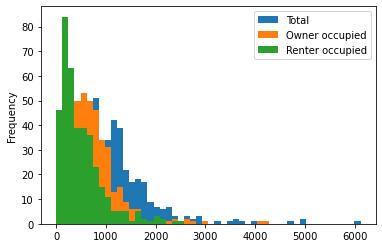

In [19]:
# Let's learn a bit more about what is happening in this set
gdf.plot.hist(bins=50)

At a glance, there seem to be more renter occupied units than owner occupied unit. But by how much?

In [ ]:
At a glance, there seem to be more renter occupied units than owner occupied unit. But by how much

In [15]:
gdf['Owner occupied'].sum()

299451.0

In [16]:
gdf['Renter occupied'].sum()

191797.0

In [18]:
# Good thing we checked! There are actually more owner occupied units over all.  Lets double check the math by verifying the total of all units.
gdf['Total'].sum()

491248.0

That looks right! Let's move onto maps to see where the units are located (i.e. population centers).

<AxesSubplot:>

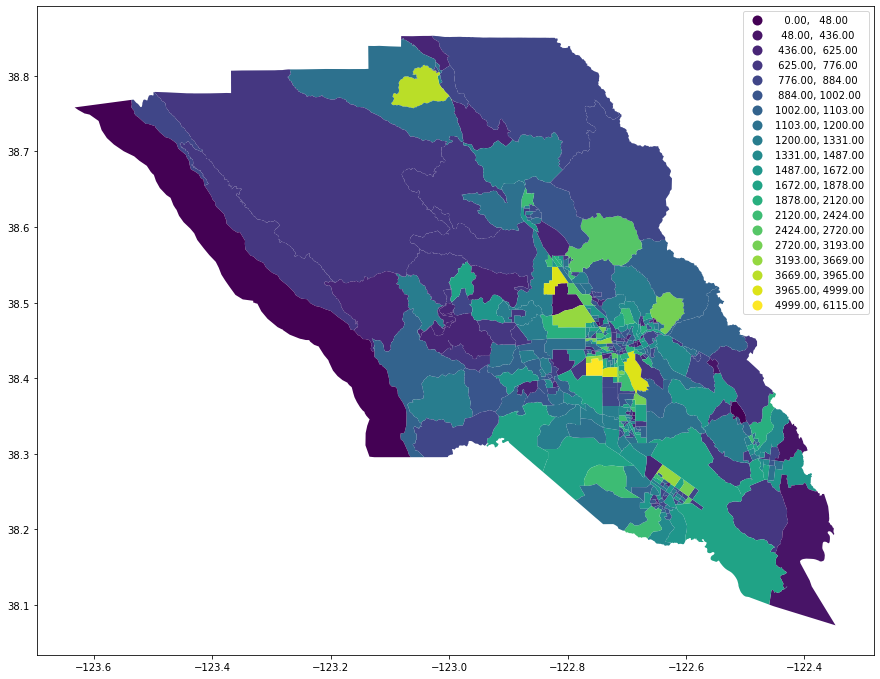

In [20]:
gdf.plot(figsize=(15,15), column = 'Total', legend = True, scheme = 'NaturalBreaks',k=20)

We can see in yellow and lighter green the urban areas and the lower denser areas in purple. Now lets see which areas are predominantly owner and renter occupied. First, we'll normalize and subset the data.

In [21]:
list(gdf)

['geoid', 'name', 'Total', 'Owner occupied', 'Renter occupied', 'geometry']

In [23]:
gdf['Percent Owner occupied'] = gdf['Owner occupied']/gdf['Total']*100
gdf['Percent Renter occupied'] = gdf['Renter occupied']/gdf['Total']*100

In [24]:
gdf.sample(5)

,geoid,name,Total,Owner occupied,Renter occupied,geometry,Percent Owner occupied,Percent Renter occupied
88,15000US060971510003,"Block Group 3, Sonoma, CA",1517.0,849.0,668.0,"MULTIPOLYGON (((-122.67787 38.23058, -122.6778...",55.965722,44.034278
100,15000US060971512034,"Block Group 4, Sonoma, CA",1379.0,671.0,708.0,"MULTIPOLYGON (((-122.70503 38.32527, -122.7049...",48.658448,51.341552
98,15000US060971512032,"Block Group 2, Sonoma, CA",1166.0,999.0,167.0,"MULTIPOLYGON (((-122.70204 38.32134, -122.7020...",85.677530,14.322470
75,15000US060971508003,"Block Group 3, Sonoma, CA",950.0,295.0,655.0,"MULTIPOLYGON (((-122.65397 38.22750, -122.6536...",31.052632,68.947368
358,15000US060971539023,"Block Group 3, Sonoma, CA",1021.0,495.0,526.0,"MULTIPOLYGON (((-122.86871 38.61234, -122.8684...",48.481881,51.518119


<AxesSubplot:>

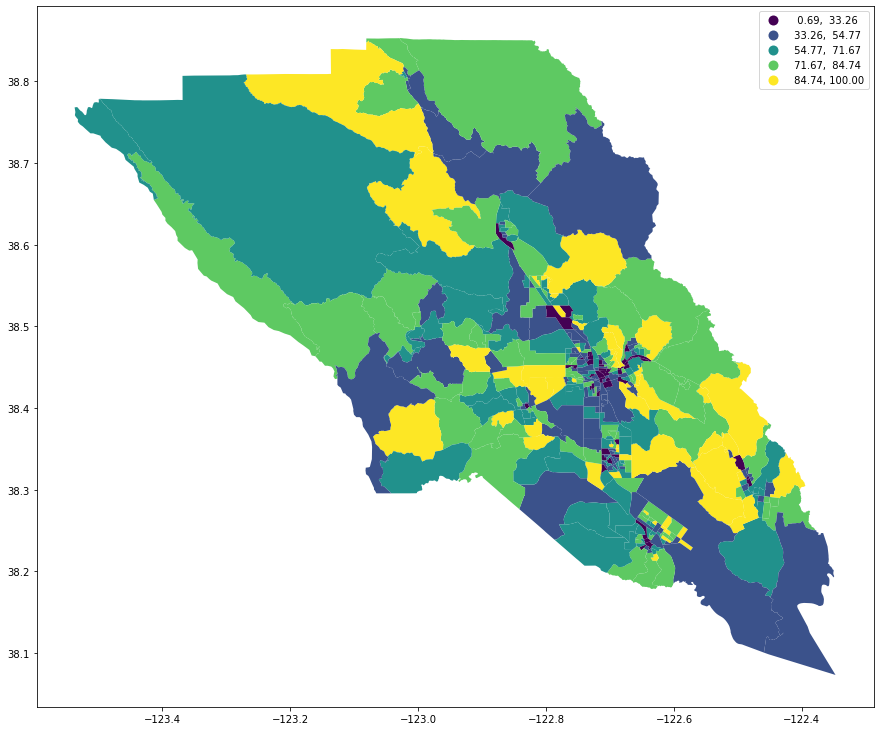

In [25]:
# Nice, now to map it:
gdf.plot(figsize=(15,15),
                 column='Percent Owner occupied',
                 legend=True, 
                 scheme='NaturalBreaks')

<AxesSubplot:>

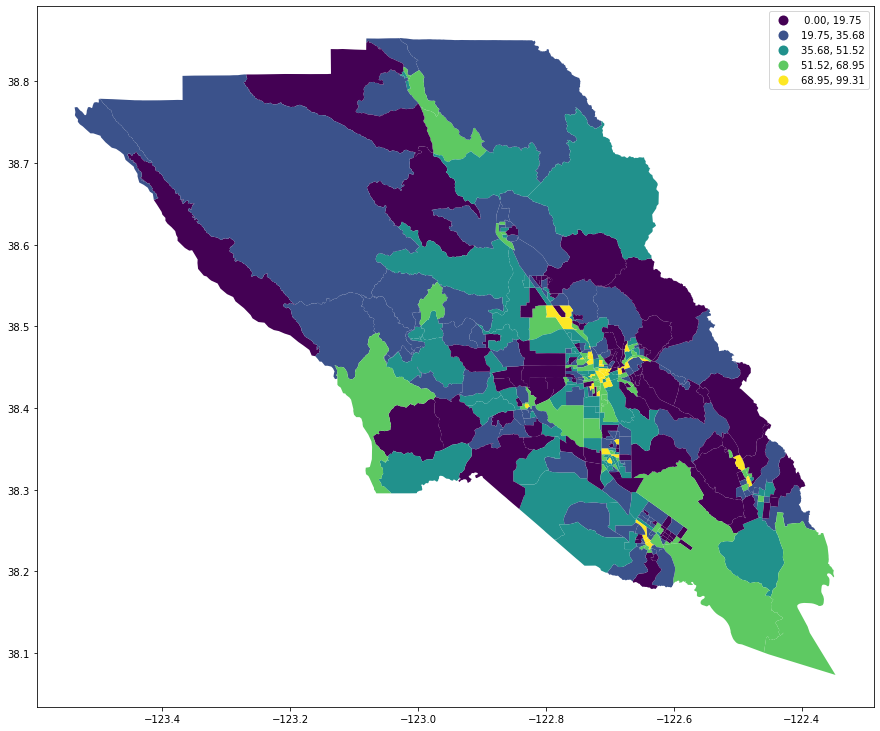

In [26]:
# It appears the outlying areas on the coast and away from the cities have the highest share of owner occupation. Let's check the inverse now:
gdf.plot(figsize=(15,15),
                 column='Percent Renter occupied',
                 legend=True, 
                 scheme='NaturalBreaks')

Now we know going forward with our project which areas of Sonoma county have the most renters.  This raises an interesting question about rents vis a vis destructive wildfires: will areas with higher percentages of renter's already be the ones where we see the greatest rent increases, because there is more competition for units relative to the population? Or will the areas with lower shares of renters be the most affected with price increases resulting from the smaller number of units available to begin with? More next time!

In [28]:
# update the notebook again